In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/DSF_HW

/content/drive/MyDrive/DSF_HW


In [3]:
# from google.colab import files
# files.upload() # kaggle.json

In [4]:
# !cp kaggle.json ~/.kaggle/

In [5]:
# !pip install --upgrade --force-reinstall --no-deps kaggle

In [6]:
# !kaggle competitions download -c microsoft-malware-prediction
# !unzip microsoft-malware-prediction.zip

# Section 1: Library and Data Imports (Q1)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
use_cols = ["MachineIdentifier", "SmartScreen", "AVProductsInstalled", "AppVersion", "CountryIdentifier", "Census_OSInstallTypeName", "Wdft_IsGamer",
           "EngineVersion", "AVProductStatesIdentifier", "Census_OSVersion", "Census_TotalPhysicalRAM", "Census_ActivationChannel",
           "RtpStateBitfield", "Census_ProcessorModelIdentifier", "Census_PrimaryDiskTotalCapacity", 
            "Census_InternalPrimaryDiagonalDisplaySizeInInches", "Wdft_RegionIdentifier", "LocaleEnglishNameIdentifier",
           "AvSigVersion", "IeVerIdentifier", "IsProtected", "Census_InternalPrimaryDisplayResolutionVertical", "Census_PrimaryDiskTypeName",
            "Census_OSWUAutoUpdateOptionsName", "Census_OSEdition", "Census_GenuineStateName", "Census_ProcessorCoreCount", 
           "Census_OEMNameIdentifier", "Census_MDC2FormFactor", "Census_FirmwareManufacturerIdentifier", "OsBuildLab", "Census_OSBuildRevision", 
            "Census_OSBuildNumber", "Census_IsPenCapable", "Census_IsTouchEnabled", "Census_IsAlwaysOnAlwaysConnectedCapable", "Census_IsSecureBootEnabled", 
            "Census_SystemVolumeTotalCapacity", "Census_PrimaryDiskTotalCapacity", "HasDetections"
           ]

In [9]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16'        
        }

In [10]:
data = pd.read_csv('train.csv', usecols=use_cols, dtype=dtypes)

# Section 2: Measure of Power (Q2a & 2b)

## 2a

I found 8 features to be relevant to computers power.
* Census_ProcessorCoreCount: of course, the more number of cores, the more powerful the machine is
* Census_TotalPhysicalRAM: same as processor cores, but at some level, more ram don't contribute much to computers power. Imaging you have a computer with 2GB of RAM, it will be day and night when you switch to one with 8GB but with 64GB, you probably dont feel any difference.
* Census_PrimaryDiskTotalCapacity: I actually divide total capacity into 4 ranges: [0, 128, 512, 1024, 10000]. They are also the range that most computer vendors segment their products. So if you have a computer with 1TB of disk, likely that it will be a high/newer model than the one with 128GB. After divide them into ranges, I will assign weights for each one.
* Census_PrimaryDiskTypeName: there are 4 differents value: HDD, SSD, UNKNOWN, and unspecified. SSD is much faster and boost the computer performance so I will assign large weight for SSD. The rest three values will have the same weight.
* Census_InternalPrimaryDisplayResolutionVertical and Census_InternalPrimaryDiagonalDisplaySizeInInches can be interprete the same like DiskTotal and DiskType. Larger screen computers are likely the gaming machines or workstation machines, hence they have more power. Also high resolution (despite of small size screen) indicates that it's a high end model, then have better build then slightly more powerful than the peers.
* Census_MDC2FormFactor decides the type of devices. Generally speaking, PCs are more powerful than laptop, workstations are better than PCs and so on.
* Wdft_IsGamer: the feature speaks itself.

After that:

**computer_power = multiply of these 8 features**

In [12]:
# Features to evaluate Computers power
power_features = ["Wdft_IsGamer", 
                  "Census_PrimaryDiskTypeName", 
                  "Census_PrimaryDiskTotalCapacity", 
                  "Census_InternalPrimaryDisplayResolutionVertical", 
                  "Census_InternalPrimaryDiagonalDisplaySizeInInches",
                  "Census_TotalPhysicalRAM",
                  "Census_ProcessorCoreCount",
                  "Census_MDC2FormFactor"]

In [13]:
power_data = data[power_features].copy()

In [14]:
# Check whether or not the data has NaN value
power_data.isnull().sum()
# And of course, a lot :)

Wdft_IsGamer                                         303451
Census_PrimaryDiskTypeName                            12844
Census_PrimaryDiskTotalCapacity                       53016
Census_InternalPrimaryDisplayResolutionVertical       46986
Census_InternalPrimaryDiagonalDisplaySizeInInches     47134
Census_TotalPhysicalRAM                               80533
Census_ProcessorCoreCount                             41306
Census_MDC2FormFactor                                     0
dtype: int64

Process NaN and transform the features into appropriate values (mostly based on my own knowledge)

In [15]:
import math
# Transform DiskType
disk_type = {"HDD": 1, "UNKNOWN": 1, "Unspecified": 1, "SSD": 1.5}
power_data["Census_PrimaryDiskTypeName"] = power_data["Census_PrimaryDiskTypeName"].fillna("UNKNOWN")
power_data['Census_PrimaryDiskTypeName'] = power_data['Census_PrimaryDiskTypeName'].replace(disk_type)

# Transform FormFactor to weights
formfactor = {"Notebook": 1, "Convertible": 1, "Detachable": 1, "Desktop": 1.1, "AllInOne": 1.1, 
              "PCOther": 1.1, "LargeTablet": 0.9, "SmallTablet": 0.8, "SmallServer": 1.15, 
              "MediumServer": 1.3, "LargeServer": 1.5, "ServerOther": 1.2, "IoTOther": 0.7}
power_data["Census_MDC2FormFactor"] = power_data["Census_MDC2FormFactor"].replace(formfactor)

# Transform MB to GB then using log base 1.12 with RAM > 30GB
ram =  "Census_TotalPhysicalRAM"
power_data[ram] = power_data[ram]/1024
power_data[ram] = power_data[ram].fillna(power_data[ram].median())
power_data[ram] = np.where(power_data[ram] > 30, np.log(power_data[ram]+1)/np.log(1.12), power_data[ram])

# Fill na for cpu count
power_data["Census_ProcessorCoreCount"] = power_data["Census_ProcessorCoreCount"].fillna(power_data["Census_ProcessorCoreCount"].median())

# Transform display size
disp_size = "Census_InternalPrimaryDiagonalDisplaySizeInInches"
power_data[disp_size] = power_data[disp_size].fillna(1)
power_data[disp_size] = np.where(power_data[disp_size] <= 11, 0.8, power_data[disp_size])
power_data[disp_size] = np.where(power_data[disp_size].between(11.0001,14), 1, power_data[disp_size])
power_data[disp_size] = np.where(power_data[disp_size].between(14.0001,16), 1.1, power_data[disp_size])
power_data[disp_size] = np.where(power_data[disp_size].between(16.0001,21), 1.12, power_data[disp_size])
power_data[disp_size] = np.where(power_data[disp_size].between(21.0001,32), 1.15, power_data[disp_size])
power_data[disp_size] = np.where(power_data[disp_size]>32, 1.2, power_data[disp_size])

# Transform resolution
resolution = "Census_InternalPrimaryDisplayResolutionVertical"
power_data[resolution] = power_data[resolution].fillna(1) # it doesn't matter since use will transform using range after that
power_data[resolution] = np.where(power_data[resolution] <=768, 1, power_data[resolution])
power_data[resolution] = np.where(power_data[resolution].between(760.0001,1080), 1.1, power_data[resolution])
power_data[resolution] = np.where(power_data[resolution].between(1080.0001, 1440), 1.15, power_data[resolution])
power_data[resolution] = np.where(power_data[resolution].between(1440.0001,2160), 1.2, power_data[resolution])
power_data[resolution] = np.where(power_data[resolution]> 2160, 1.3, power_data[resolution])

#Transform disk capacity
disk_capacity = "Census_PrimaryDiskTotalCapacity"
power_data[disk_capacity] = power_data[disk_capacity].fillna(power_data[disk_capacity].median())
power_data[disk_capacity] = power_data[disk_capacity] / 1024
power_data[disk_capacity] = np.where(power_data[disk_capacity].between(0,128), 0.9, power_data[disk_capacity])
power_data[disk_capacity] = np.where(power_data[disk_capacity].between(128.0001, 256), 1, power_data[disk_capacity])
power_data[disk_capacity] = np.where(power_data[disk_capacity].between(256.0001, 512), 1.1, power_data[disk_capacity])
power_data[disk_capacity] = np.where(power_data[disk_capacity].between(512.0001, 1024), 1.2, power_data[disk_capacity])
power_data[disk_capacity] = np.where(power_data[disk_capacity] > 1024, 1.25, power_data[disk_capacity])

# Gaming machines has 1.125 time more power than the regular ones
power_data["Wdft_IsGamer"] = power_data["Wdft_IsGamer"].fillna(0.0) # Better to be non-gaming machine
power_data["Wdft_IsGamer"] = power_data["Wdft_IsGamer"]/8 + 1

Form the new `computer_power` column and evaluate its stats.

In [16]:
power_data["computer_power"] = power_data.prod(axis=1)

In [17]:
# Stats
print("Mean:", power_data["computer_power"].mean())
print("Std:", power_data["computer_power"].std())
print("Median:", power_data["computer_power"].median())

Mean: 48.781966045120285
Std: 109.78698285755306
Median: 21.77226609690115


[]

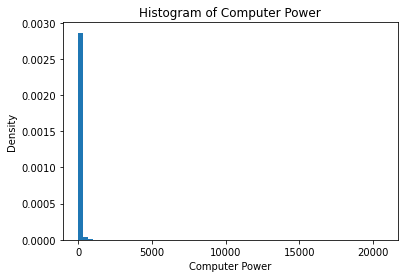

In [18]:
# Plot the histogram
plt.hist(power_data["computer_power"], bins=60, density=True)
plt.title('Histogram of Computer Power')
plt.ylabel("Density")
plt.xlabel("Computer Power")
plt.plot()

As we can see, the distribution is skewed to the left, as most of the machines are in some range. It looks like Beta distribution, so why not take a log of it.

[]

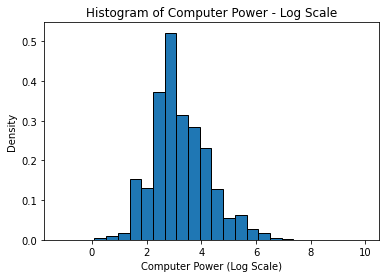

In [19]:
_, bins, _ = plt.hist(np.log(power_data["computer_power"]), bins=26, density=True, ec='black')
plt.title('Histogram of Computer Power - Log Scale')
plt.ylabel("Density")
plt.xlabel("Computer Power (Log Scale)")
plt.plot()

In [20]:
bins

array([-1.19187031, -0.76389542, -0.33592054,  0.09205435,  0.52002923,
        0.94800411,  1.375979  ,  1.80395388,  2.23192877,  2.65990365,
        3.08787854,  3.51585342,  3.94382831,  4.37180319,  4.79977808,
        5.22775296,  5.65572785,  6.08370273,  6.51167761,  6.9396525 ,
        7.36762738,  7.79560227,  8.22357715,  8.65155204,  9.07952692,
        9.50750181,  9.93547669])

The distribution now has the shape of bell curve from Normal Distribution.

## 2b

In [21]:
# First, add the HasDetections column to the DataFrame
power_data["HasDetections"] = data["HasDetections"]

# Then drop all columns except computer_power and HasDetections to free the memory.
power_data = power_data[["computer_power", "HasDetections"]]

In [22]:
power_data["computer_power"] = np.log(power_data["computer_power"])

In [24]:
# First, we take bins variable from log scale histogram to count the number of machines in each bin
num_machine_perbin = power_data["computer_power"].value_counts(bins=bins, sort=False).to_numpy()
num_machine_perbin

array([      6,      43,    2219,   15374,   34832,   61524,  580869,
        499774, 1420355, 1992901, 1202790, 1088544,  887756,  491564,
        211437,  236398,  100138,   64236,   18279,    7537,    2755,
          1528,     456,     127,      35,       6])

In [25]:
# Then, count the number of infected machines per bin
num_infected_perbin = power_data[power_data["HasDetections"]==1]["computer_power"].value_counts(bins=bins, sort=False).to_numpy()
num_infected_perbin

array([     2,      5,    498,   3822,  10525,  18746, 242896, 217120,
       649128, 996184, 617752, 579857, 483398, 270396, 120712, 135325,
        58032,  37704,  10182,   4085,   1432,    790,    221,     62,
           17,      1])

In [26]:
# I will use mean of each bin to represent as x_axis
x_axis = (bins[1:] + bins[:-1])/2

[]

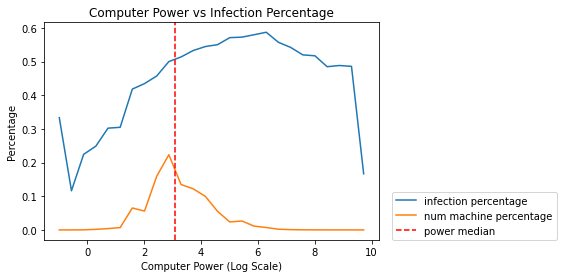

In [27]:
plt.plot(x_axis, num_infected_perbin/num_machine_perbin, label="infection percentage")
plt.plot(x_axis, num_machine_perbin/num_machine_perbin.sum(), label="num machine percentage")
plt.axvline(x=power_data["computer_power"].median(), color='r', linestyle="--", label="power median")
plt.title('Computer Power vs Infection Percentage')
plt.ylabel("Percentage")
plt.xlabel("Computer Power (Log Scale)")
plt.legend(loc=(1.04,0))
plt.plot()

So, the graph has 3 lines. First, using num machine percentage line and focusing around the range of computer power from 1 to 5, where has the most data, we can see that less power machine is also less likely to be infected by malwares. When the machine power increases, also the infection percentage increases, but at a point, around 7, machines are become less likely to get malwares as the power going up. Besides, the most powerful machines are much stronger against malicous programs.

In [28]:
# delete dataframe to free up memory
del power_data

# Section 3: OS version vs Malware detected (Q3)

In [119]:
num_machines_per_osbuild = data["Census_OSBuildNumber"].value_counts(sort=False).to_numpy()
num_infected_per_osbuild = data[data["HasDetections"] == 1]["Census_OSBuildNumber"].value_counts(sort=False).to_numpy()

In [120]:
infected_machines = data[data["HasDetections"] == 1]["Census_OSBuildNumber"].value_counts(sort=False)

In [121]:
x_axis = data["Census_OSBuildNumber"].value_counts(sort=False).sort_index().index

In [122]:
total_machine = data["Census_OSBuildNumber"].value_counts(sort=False)

In [123]:
per_infected = []
for i in x_axis:
    if i in infected_machines:
        per_infected.append(infected_machines[i]/total_machine[i])
    else:
        per_infected.append(0)

In [124]:
infected_machines_per_os = []
for i in x_axis:
    if i in infected_machines:
        infected_machines_per_os.append(infected_machines[i])
    else:
        infected_machines_per_os.append(0)

[]

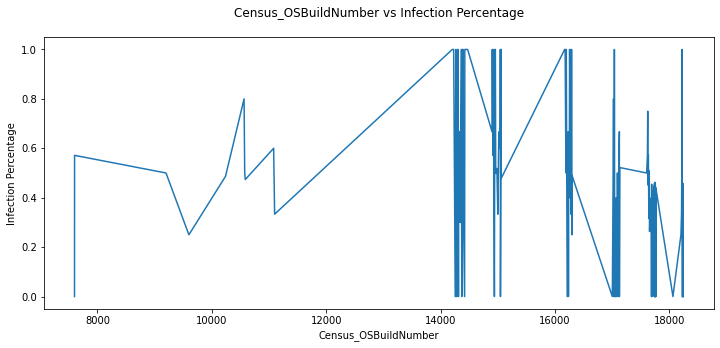

In [125]:
plt.figure(figsize=(12,5))
plt.plot(x_axis, per_infected)
plt.title('Census_OSBuildNumber vs Infection Percentage', pad=20)
plt.ylabel("Infection Percentage")
plt.xlabel("Census_OSBuildNumber")
plt.plot()

The plot is so weird and hard to interprete. Because we treat OSBuildNumber as continuous variable, while in fact, they should be categorical variable with chronological meaning. So I will treat them as categorical data to see what happen. 

[]

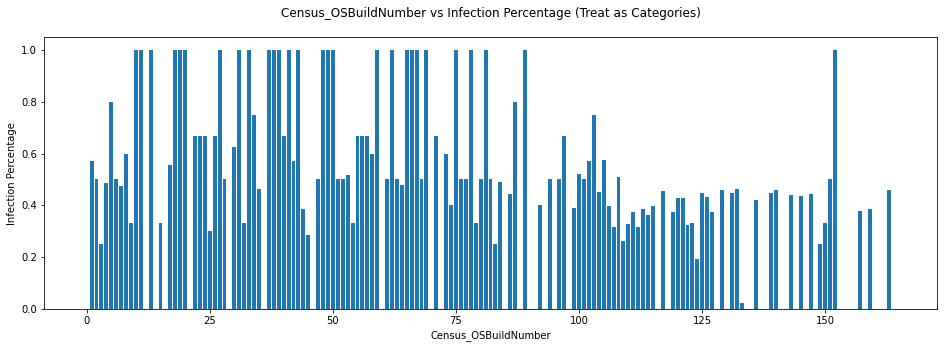

In [126]:
plt.figure(figsize=(16,5))
plt.bar(np.arange(0,len(x_axis)), per_infected)
plt.title('Census_OSBuildNumber vs Infection Percentage (Treat as Categories)', pad=20)
plt.ylabel("Infection Percentage")
plt.xlabel("Census_OSBuildNumber")
plt.plot()

Now it's much easier to read. We can see that the left area is more dense, thus it tends to have higher percentage of infection. This aligns with my thoughts that old devices are more vulnerable to malwares.

In [127]:
infected_machines = infected_machines.to_numpy() 

[]

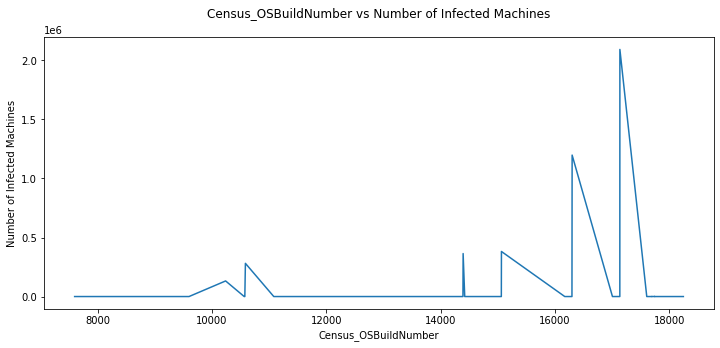

In [128]:
plt.figure(figsize=(12,5))
plt.plot(x_axis, infected_machines_per_os)
plt.title('Census_OSBuildNumber vs Number of Infected Machines', pad=20)
plt.ylabel("Number of Infected Machines")
plt.xlabel("Census_OSBuildNumber")
plt.plot()

Same as the previous plot, it just hard to read when we treat BuildNumber as continuous variable.

[]

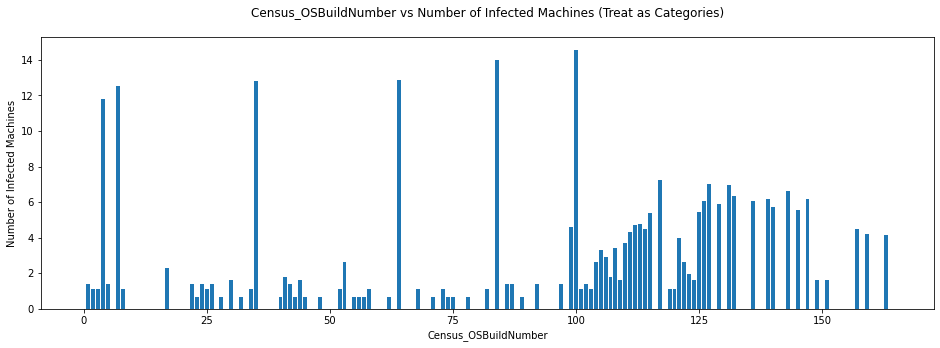

In [139]:
plt.figure(figsize=(16,5))
infected_machines_per_os = np.array(infected_machines_per_os)
plt.bar(np.arange(0, len(x_axis)), np.log(np.where(infected_machines_per_os == 0, 1, infected_machines_per_os)))
plt.title('Census_OSBuildNumber vs Number of Infected Machines (Treat as Categories)', pad=20)
plt.ylabel("Number of Infected Machines")
plt.xlabel("Census_OSBuildNumber")
plt.plot()

With this log scale plot, we can see that some particular version have very large number of infected machines. While the newer OS Builds also have a higher total of infected machines. The reason maybe many machines are updated to the newer/newest OSBuild so the total of machines is large, hence the number of infected machines is high.

## Census_OSBuildRevision

In [40]:
num_machines_per_osbuild = data["Census_OSBuildRevision"].value_counts(sort=False).to_numpy()
num_infected_per_osbuild = data[data["HasDetections"] == 1]["Census_OSBuildRevision"].value_counts(sort=False).to_numpy()

infected_machines = data[data["HasDetections"] == 1]["Census_OSBuildRevision"].value_counts(sort=False)
x_axis = data["Census_OSBuildRevision"].value_counts(sort=False).sort_index().index
total_machine = data["Census_OSBuildRevision"].value_counts(sort=False)

In [41]:
per_infected = []
for i in x_axis:
    if i in infected_machines:
        per_infected.append(infected_machines[i]/total_machine[i])
    else:
        per_infected.append(0)

In [42]:
infected_machines_per_os = []
for i in x_axis:
    if i in infected_machines:
        infected_machines_per_os.append(infected_machines[i])
    else:
        infected_machines_per_os.append(0)

infected_machines_per_os = np.array(infected_machines_per_os)

[]

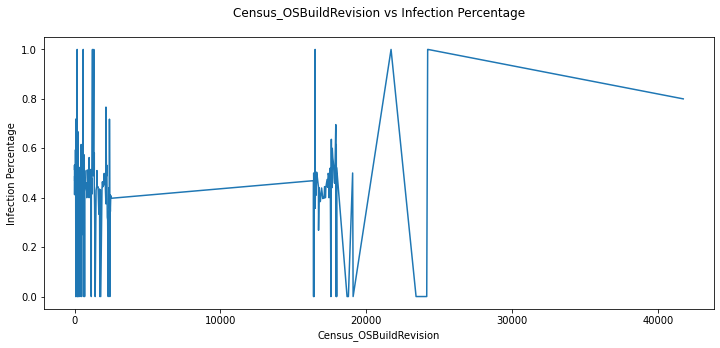

In [43]:
plt.figure(figsize=(12,5))
plt.plot(x_axis, per_infected)
plt.title('Census_OSBuildRevision vs Infection Percentage', pad=20)
plt.ylabel("Infection Percentage")
plt.xlabel("Census_OSBuildRevision")
plt.plot()

[]

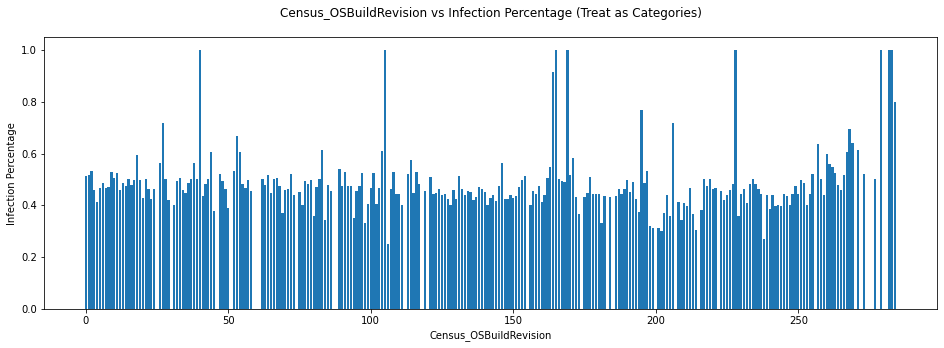

In [44]:
plt.figure(figsize=(16,5))
plt.bar(np.arange(0,len(x_axis)), per_infected)
plt.title('Census_OSBuildRevision vs Infection Percentage (Treat as Categories)', pad=20)
plt.ylabel("Infection Percentage")
plt.xlabel("Census_OSBuildRevision")
plt.plot()

Some builds have very high infection percentage. It might be a good signal to build a model, OR it's just because these builds have a very small number of machines still use it. 

But we definitely see that with the more recent builds, the infection percentage is also higher. And we are pretty sure that recent builds are appeared in most of machines. Thus, I think in some senses, it indicates that either malwares target on newer OSBuilds or the newer OSBuilds are actually more vulnerable to malwares.

[]

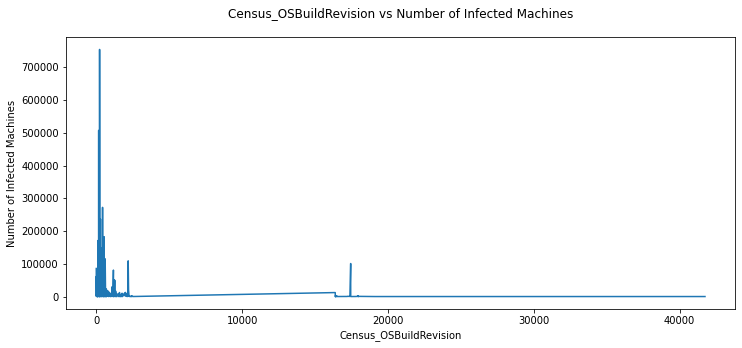

In [45]:
plt.figure(figsize=(12,5))
plt.plot(x_axis, infected_machines_per_os)
plt.title('Census_OSBuildRevision vs Number of Infected Machines', pad=20)
plt.ylabel("Number of Infected Machines")
plt.xlabel("Census_OSBuildRevision")
plt.plot()

[]

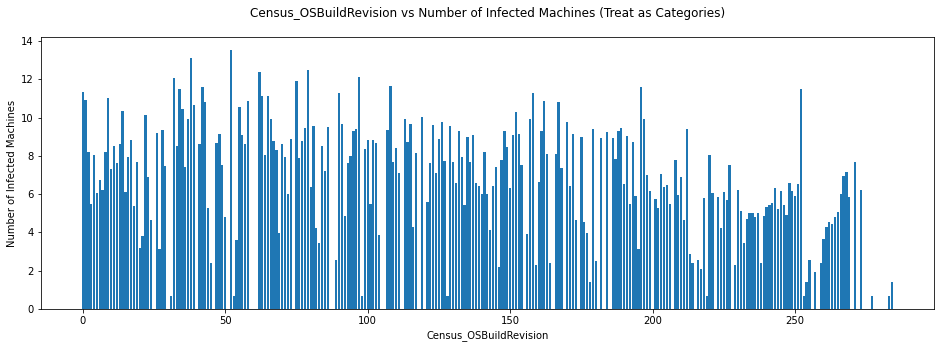

In [46]:
plt.figure(figsize=(16,5))
plt.bar(np.arange(0, len(x_axis)), np.log(np.where(infected_machines_per_os == 0, 1, infected_machines_per_os)))
plt.title('Census_OSBuildRevision vs Number of Infected Machines (Treat as Categories)', pad=20)
plt.ylabel("Number of Infected Machines")
plt.xlabel("Census_OSBuildRevision")
plt.plot()

From the plot, I think we can inference that the old OSBuildRevisions are likely to get infected.

# Section 4: Effect of Number of AV Products Installed (Q4)

In [47]:
# First, let's count the number of machines per number of AVs installed.
data["AVProductsInstalled"].value_counts(sort=False).sort_index()

0.0          1
1.0    6208893
2.0    2459008
3.0     208103
4.0       8757
5.0        471
6.0         28
7.0          1
Name: AVProductsInstalled, dtype: int64

In [48]:
total_machines_per_numAV = data["AVProductsInstalled"].value_counts(sort=False).sort_index().to_numpy()
x_axis = data["AVProductsInstalled"].value_counts(sort=False).sort_index().index

In [49]:
infected_machines_per_numAV = []
infected_numAV = data[data["HasDetections"] == 1]["AVProductsInstalled"].value_counts(sort=False)
for i in x_axis:
    if i in infected_numAV:
        infected_machines_per_numAV.append(infected_numAV[i])
    else:
        infected_machines_per_numAV.append(0)

infected_machines_per_numAV = np.array(infected_machines_per_numAV)

[]

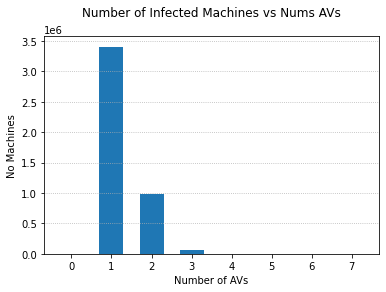

In [50]:
plt.bar(x_axis, infected_machines_per_numAV, 0.6)
plt.title('Number of Infected Machines vs Nums AVs', pad=20)
plt.ylabel("No Machines")
plt.xlabel("Number of AVs")
plt.grid(linestyle="dotted", axis="y")
plt.plot()

From this figure, we can see that with 1 AV installed have far higher number of infected machines. The reason may be that most machines only install one AV, then the number of infected machines followed. 

[]

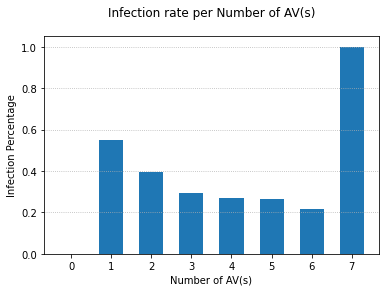

In [51]:
plt.bar(x_axis, infected_machines_per_numAV/total_machines_per_numAV, 0.6)
plt.title('Infection rate per Number of AV(s)', pad=20)
plt.ylabel("Infection Percentage")
plt.xlabel("Number of AV(s)")
plt.grid(linestyle="dotted", axis="y")
plt.plot()

So to better understand, I plot the percentage of malwares infection per num AVs. Except 0 and 7, where only have 1 machines, we can see a pattern that **the more number of AVs installed, the less likely the machines got malwares**. But maybe the percentage data is spoiled on 4, 5, 6 where there are very few datapoints compared to others.

One more feature that can say something about num of AVs is IsProtected. So basically, if the value is 1, then the machines have the highest/strongest protection against malwares.

In [52]:
total_protected, total_unprotected = data["IsProtected"].value_counts(sort=False).to_numpy()
data["IsProtected"].value_counts(sort=False)

0.0     483157
1.0    8402282
Name: IsProtected, dtype: int64

In [53]:
total_normal_0, total_infected_0 = data[data["IsProtected"] == 0]["HasDetections"].value_counts(sort=False).to_numpy()
data[data["IsProtected"] == 0]["HasDetections"].value_counts(sort=False)

0    298904
1    184253
Name: HasDetections, dtype: int64

In [54]:
total_normal_1, total_infected_1 = data[data["IsProtected"] == 1]["HasDetections"].value_counts(sort=False)
data[data["IsProtected"] == 1]["HasDetections"].value_counts(sort=False)

0    4141184
1    4261098
Name: HasDetections, dtype: int64

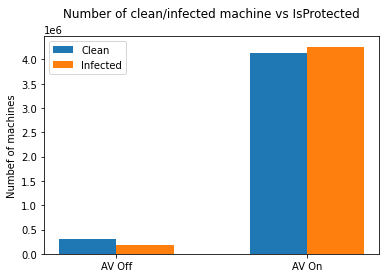

In [55]:
fig, ax = plt.subplots()

ax.bar([0-0.15, 1-0.15], [total_normal_0, total_normal_1], 0.3, label="Clean")
ax.bar([0+0.15, 1+0.15], [total_infected_0, total_infected_1], 0.3, label="Infected")
ax.set_xticks([0,1])
ax.set_xticklabels(["AV Off", "AV On"])
ax.set_ylabel("Numbef of machines")
ax.set_title("Number of clean/infected machine vs IsProtected", pad=20)

ax.legend()
plt.show()

But frankly, with AV On, there is more number of infected machines. 

So my conclusion is: **Yes, the number of AVs you use does matter**

# Section 5: Interesting findings (Q5)

In [109]:
use_cols = ["AVProductsEnabled", "HasTpm", "CountryIdentifier", "HasDetections"]
q5_data = pd.read_csv('train.csv', usecols=use_cols)

## Feature 1: HasTpm

TPM Chip is a dedicated solution to fight against malwares and other malicious programs. But does it really work? Let's find out.

In [110]:
infected_tpm = q5_data[q5_data["HasDetections"]==1]["HasTpm"].value_counts(sort=False).to_numpy()
normal_tpm = q5_data[q5_data["HasDetections"]==0]["HasTpm"].value_counts(sort=False).to_numpy()

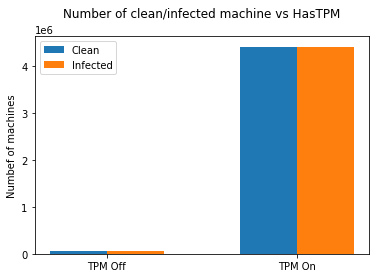

In [111]:
fig, ax = plt.subplots()

ax.bar([0-0.15, 1-0.15], normal_tpm, 0.3, label="Clean")
ax.bar([0+0.15, 1+0.15], infected_tpm, 0.3, label="Infected")
ax.set_xticks([0,1])
ax.set_xticklabels(["TPM Off", "TPM On"])
ax.set_ylabel("Numbef of machines")
ax.set_title("Number of clean/infected machine vs HasTPM", pad=20)

ax.legend()
plt.show()

As we can see, with or without TPM, the number of clean and infected machines are pretty the same. So it may helps with critical attacks or something else, but in general, it seems to have very modest effect.

## Feature 2: AVProductsEnabled

We already discussed 2 AVs related features before. But AVProductsEnabled is very strong feature to indicate the actual number of AVs that affect number of malwares.

In [112]:
total_machines_ena = q5_data["AVProductsEnabled"].value_counts(sort=False).sort_index().to_numpy()
infected_machines_ena = q5_data[q5_data["HasDetections"]==1]["AVProductsEnabled"].value_counts(sort=False).sort_index().to_numpy()

[]

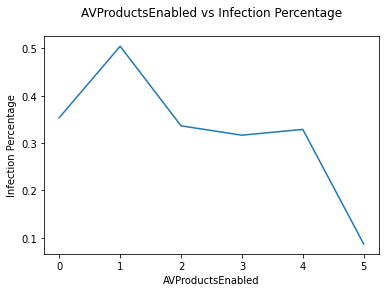

In [113]:
plt.plot(infected_machines_ena/total_machines_ena)
plt.title('AVProductsEnabled vs Infection Percentage', pad=20)
plt.ylabel("Infection Percentage")
plt.xlabel("AVProductsEnabled")
plt.plot()

With most machines have 1 AV, as we discussed previously, then the percentage of 1 AV is highes. But with the number of AVs increases, the percentage also goes down. So it's a good signal to strengthen the point in Q4. But we still have one doubt, does the number of machines per AVs not skew much?

[]

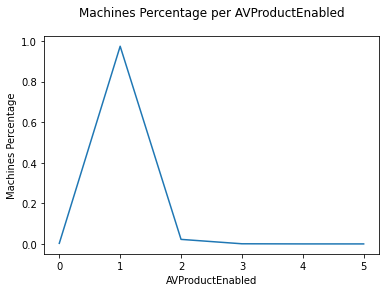

In [114]:
plt.plot(total_machines_ena/total_machines_ena.sum())
plt.title('Machines Percentage per AVProductEnabled', pad=20)
plt.ylabel("Machines Percentage")
plt.xlabel("AVProductEnabled")
plt.plot()

But sadly, most (about 97% I guess) machines have 1 AV enabled. So then, I have less confidence to say we have stronger protection with more AV run simultaneously.

## Feature 3: CountryIdentifier

To answer the question, do attackers target specific victims in a location? Let's find out!

In [115]:
total_per_country = q5_data["CountryIdentifier"].value_counts(sort=False).sort_index()
infected_per_country = q5_data[q5_data["HasDetections"]==1]["CountryIdentifier"].value_counts(sort=False).sort_index()

[]

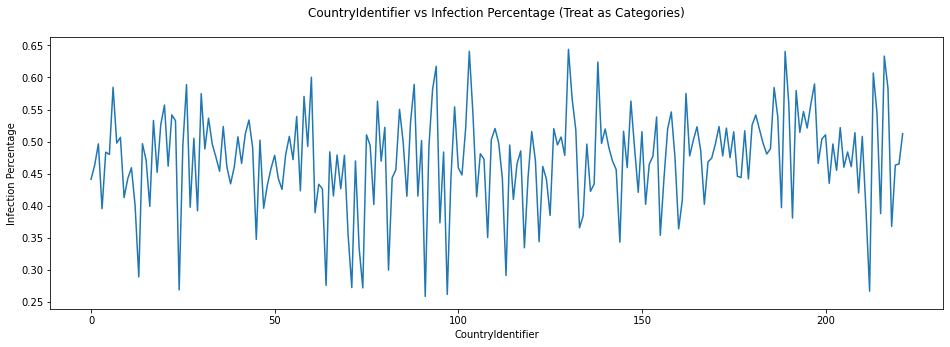

In [116]:
plt.figure(figsize=(16,5))
plt.plot(np.arange(0,222), infected_per_country/total_per_country)
plt.title('CountryIdentifier vs Infection Percentage (Treat as Categories)', pad=20)
plt.ylabel("Infection Percentage")
plt.xlabel("CountryIdentifier")
plt.plot()

From this figure, it's safe to say that locations do really matter to the malwares infection. But without the actual number per country, percentage can't say much.

[]

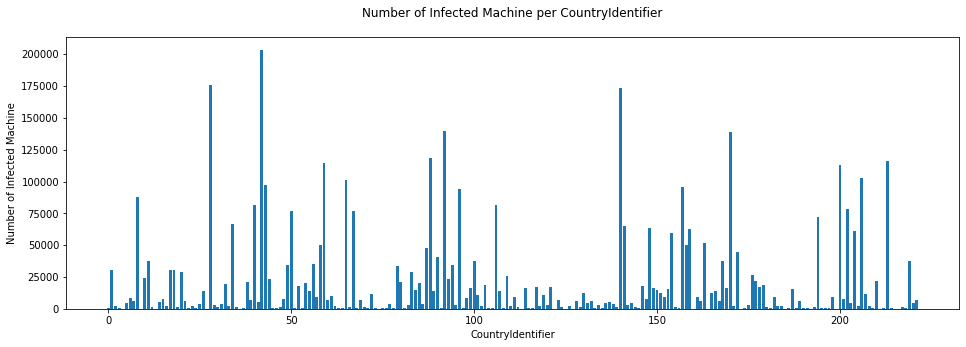

In [117]:
plt.figure(figsize=(16,5))
plt.bar(np.arange(0,222), infected_per_country)
plt.title('Number of Infected Machine per CountryIdentifier', pad=20)
plt.ylabel("Number of Infected Machine")
plt.xlabel("CountryIdentifier")
plt.plot()

With this figure, we can see that some particular country have very high number of infection. Combining with percentage data, we can identify some location that more likely to be attacked. 

# Section 6: Baseline modelling (Q6)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [57]:
# First, split train test for both Q6 and Q7
data_train, data_test = train_test_split(data, test_size=0.2, random_state=0)

After dividing train and test set, as a rule, I **won't touch** anything in the test set, except apply transformations that I mined from train set to it (normalization, fill nan, etc)

In [58]:
# I will buld a simple logistic regression with a subset of features, mainly the numerical ones
model0_features = ["Census_ProcessorCoreCount",
                   "Census_TotalPhysicalRAM",
                   "AVProductsInstalled",
                   "Census_OSBuildNumber",
                   "Census_OSBuildRevision",
                   "Wdft_IsGamer",
                   "HasDetections"]

In [59]:
data_train_0 = data_train[model0_features].copy()
data_test_0 = data_test[model0_features].copy()

In [60]:
# Count NaN
data_train_0.isnull().sum()

Census_ProcessorCoreCount     32984
Census_TotalPhysicalRAM       64360
AVProductsInstalled           28888
Census_OSBuildNumber              0
Census_OSBuildRevision            0
Wdft_IsGamer                 242651
HasDetections                     0
dtype: int64

In [61]:
# For numerical data, I will fill the median
# Also for ram and disk, I will transform it from MB to GB for smaller numbers.

for feat in model0_features[:4]:
    data_train_0[feat] = data_train_0[feat].fillna(data_train_0[feat].median())
    # Apply the median from train data to transform test data
    data_test_0[feat] = data_test_0[feat].fillna(data_train_0[feat].median())
    if feat in ["Census_PrimaryDiskTotalCapacity", "Census_TotalPhysicalRAM"]:
        data_train_0[feat] = data_train_0[feat]/1024
        data_test_0[feat] = data_test_0[feat]/1024

# # For categorical/binary data, I will fill the mode
data_train_0["Wdft_IsGamer"] = data_train_0["Wdft_IsGamer"].fillna(data_train_0["Wdft_IsGamer"].mode().values[0])
data_test_0["Wdft_IsGamer"] = data_test_0["Wdft_IsGamer"].fillna(data_train_0["Wdft_IsGamer"].mode().values[0])

In [62]:
# NaN values on both sets after filling, just sanity checking.
data_train_0.isnull().sum()

Census_ProcessorCoreCount    0
Census_TotalPhysicalRAM      0
AVProductsInstalled          0
Census_OSBuildNumber         0
Census_OSBuildRevision       0
Wdft_IsGamer                 0
HasDetections                0
dtype: int64

In [63]:
# Convert DataFrame to NumPy
X_train = data_train_0[model0_features[:-1]].to_numpy()
X_test = data_test_0[model0_features[:-1]].to_numpy()
y_train = data_train_0[model0_features[-1]].to_numpy()
y_test = data_test_0[model0_features[-1]].to_numpy()

In [64]:
model0 = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = model0.predict(X_test)

In [65]:
print("model 0 Error rate: {:0.4f}".format(1 - accuracy_score(y_test, y_pred)))
print("model 0 AUC score: {:0.4f}".format(roc_auc_score(y_test, model0.predict_proba(X_test)[:,1])))

model 0 Error rate: 0.4666
model 0 AUC score: 0.5569


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.65      0.58    892097
           1       0.54      0.42      0.47    892200

    accuracy                           0.53   1784297
   macro avg       0.54      0.53      0.53   1784297
weighted avg       0.54      0.53      0.53   1784297



The error rate may come from:
* I treat OSBuild and OSRevision as continuous variable, while they are really not.
* Other numerical variables are not normalized/scaled yet. So as discuss in Q2, some machines are much more powerful than the rest, to model's weight to its will be very small, and affect the majority data.

# Section 7: Feature Cleaning and Additional models (Q7a & Q7b)

## Improvement over Q6 by Preprocessing

This is not part of Q7, but I really wanted to see the performance gain over Q6's result using preprocessing.

As we've already seen in Q2, ProcessorCoreCount and TotalPhysicalRAM have very wide range of values, so it's generally bad to use non-scaled values as features.

I performed RobustScaler on both features and saw an improvement (2%) over non-scaled features.

In [67]:
# Robust scaler on Census_ProcessorCoreCount
robust = RobustScaler().fit(X_train[:,0].reshape(-1, 1))
X_train[:, 0] = robust.transform(X_train[:,0].reshape(-1, 1)).squeeze()
X_test[:, 0] = robust.transform(X_test[:,0].reshape(-1, 1)).squeeze()

In [68]:
# Robust scaler on Census_TotalPhysicalRAM
robust = RobustScaler().fit(X_train[:,1].reshape(-1, 1))
X_train[:, 1] = robust.transform(X_train[:,1].reshape(-1, 1)).squeeze()
X_test[:, 1] = robust.transform(X_test[:,1].reshape(-1, 1)).squeeze()

In [69]:
model_tmp = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = model_tmp.predict(X_test)
print("model 1 Error rate: {:0.4f}".format(1 - accuracy_score(y_test, y_pred)))
print("model 1 AUC score: {:0.4f}".format(roc_auc_score(y_test, model_tmp.predict_proba(X_test)[:,1])))

model 1 Error rate: 0.4460
model 1 AUC score: 0.5856


In [70]:
# Delete some variables to free up memory
del data_test_0, data_train_0, X_train, X_test, y_train, y_test

## Dataset

In [71]:
model12_features = ["Census_ProcessorCoreCount",
                    'Census_PrimaryDiskTotalCapacity',
                    "Census_SystemVolumeTotalCapacity",
                    "Census_TotalPhysicalRAM",
                    "AVProductsInstalled",
                    "Wdft_IsGamer",
                    "EngineVersion",
                    "AppVersion",
                    "AvSigVersion",
                    "Census_OSBuildNumber",
                    "Census_OSBuildRevision",
                    "HasDetections"]

In [72]:
data_train_1 = data_train[model12_features].copy()
data_test_1 = data_test[model12_features].copy()

In [73]:
data_train_1.isnull().sum()

Census_ProcessorCoreCount            32984
Census_PrimaryDiskTotalCapacity      42302
Census_SystemVolumeTotalCapacity     42291
Census_TotalPhysicalRAM              64360
AVProductsInstalled                  28888
Wdft_IsGamer                        242651
EngineVersion                            0
AppVersion                               0
AvSigVersion                             0
Census_OSBuildNumber                     0
Census_OSBuildRevision                   0
HasDetections                            0
dtype: int64

In [74]:
# Also import and preprocess test data for Q8
test_features = ['MachineIdentifier'] + model12_features[:-1]
test = pd.read_csv('test.csv', usecols=test_features, dtype=dtypes)
result = test['MachineIdentifier'].copy()
test = test.drop(['MachineIdentifier'], axis=1)

## Pre-process dataset

Step 1: Fill NaN

In [75]:
num_feats = ["Census_ProcessorCoreCount",
            'Census_PrimaryDiskTotalCapacity',
            "Census_SystemVolumeTotalCapacity",
            "Census_TotalPhysicalRAM"
            ]

cate_feats = ["AVProductsInstalled",
              "Wdft_IsGamer"
              ]
                    
ver_feats = ["EngineVersion",
            "AppVersion",
            "AvSigVersion",
            "Census_OSBuildNumber",
            "Census_OSBuildRevision"
            ]

I fill NaN value from numerical features with its median. Because these features have some very large values datapoints, so it's better to use median.

In [76]:
# For numerical features
for feat in num_feats:
    data_train_1[feat] = data_train_1[feat].fillna(data_train_1[feat].median())
    data_test_1[feat] = data_test_1[feat].fillna(data_train_1[feat].median())
    test[feat] = test[feat].fillna(data_train_1[feat].median())

For categorical features, I use mode, which is the most likely value. 

In [77]:
1# For categorical features
for feat in cate_feats:
    data_train_1[feat] = data_train_1[feat].fillna(data_train_1[feat].mode().values[0])
    data_test_1[feat] = data_test_1[feat].fillna(data_train_1[feat].mode().values[0])
    test[feat] = test[feat].fillna(data_train_1[feat].mode().values[0])

Step 2: Scale/Normalize numerical features

According to sklearn documentation, with outliers (the very powerful machines), I should you RobustScaler. I actually tested with StandardScaler and MinMaxScaler too, and RobustScaler have slightly better than StandardScaler.

In [78]:
for feat in num_feats:
    robust = RobustScaler().fit(data_train_1[feat].to_numpy().reshape(-1, 1))
    data_train_1[feat] = robust.transform(data_train_1[feat].to_numpy().reshape(-1, 1)).squeeze()
    data_test_1[feat] = robust.transform(data_test_1[feat].to_numpy().reshape(-1, 1)).squeeze()
    test[feat] = robust.transform(test[feat].to_numpy().reshape(-1, 1)).squeeze()

Step 3: Frequency encoding version features

Frequency encoding is a very popular technique to treat these kind of features, when you have high number of values.

In [79]:
# For version features, I use frequency encoding.
for feat in ver_feats:
    trans = data_train_1.groupby(feat).size()/len(data_train_1)
    data_train_1[feat] = data_train_1[feat].map(trans)
    data_test_1[feat] = data_test_1[feat].map(trans)
    data_test_1[feat] = data_test_1[feat].fillna(0) #  There may be some data points that only appear on test set -> freq = 0

    test[feat] = test[feat].map(trans)
    test[feat] = test[feat].fillna(0)

Convert DataFrame to Numpy array

In [80]:
X_train = data_train_1[model12_features[:-1]].to_numpy()
X_test = data_test_1[model12_features[:-1]].to_numpy()
y_train = data_train_1[model12_features[-1]].to_numpy()
y_test = data_test_1[model12_features[-1]].to_numpy()

## 7a: Logistic Regression with processed dataset

In [81]:
model1 = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [82]:
print("model 1 Error rate: {:0.4f}".format(1 - accuracy_score(y_test, y_pred)))
print("model 1 AUC score: {:0.4f}".format(roc_auc_score(y_test, model1.predict_proba(X_test)[:,1])))

model 1 Error rate: 0.4216
model 1 AUC score: 0.6080


## 7b: Other ML algorithms with processed dataset

In [83]:
from xgboost import XGBClassifier

model2 = XGBClassifier().fit(X_train, y_train)
y_pred = model2.predict(X_test)

[06:01:51] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [84]:
print("model 2 Error rate: {:0.4f}".format(1 - accuracy_score(y_test, y_pred)))
print("model 2 AUC score: {:0.4f}".format(roc_auc_score(y_test, model2.predict_proba(X_test)[:,1])))

model 2 Error rate: 0.3978
model 2 AUC score: 0.6416


|           | Error rate | AUC Score |
|-----------|------------|-----------|
| model 0   | 0.4666     | 0.5569    |
| model 1   | 0.4216     | 0.6080    |
| model 2   | 0.3978     | 0.6416    |
| model_tmp | 0.4460     | 0.5856    |

* model_tmp is a model with the same feature set as model0 but had been preprocessing.

* So as we can see, processing really helps the model to achieve higher result (from model0 to model_tmp).

* Also by choosing some features that I think contribute to how likely a machine will get malwares, such as EngineVer (version of defender engine). These new features with preprocessing helps model learn better (as from model 0 to 1).

* Model 2 is the strongest model using XGBoost, so obviously it is the best one. But you will be surprise in Q8.

# Section 8: Screenshots (Q8)

In [95]:
prob_0 = model0.predict_proba(test[model0_features[:-1]].to_numpy())

In [96]:
prob_1 = model1.predict_proba(test[model12_features[:-1]].to_numpy())

In [97]:
prob_2 = model2.predict_proba(test[model12_features[:-1]].to_numpy())

In [105]:
pd.DataFrame({"MachineIdentifier": result, "HasDetections": prob_0[:,1]}).to_csv("submission_0.csv", index=False)

In [106]:
pd.DataFrame({"MachineIdentifier": result, "HasDetections": prob_1[:,1]}).to_csv("submission_1.csv", index=False)

In [107]:
pd.DataFrame({"MachineIdentifier": result, "HasDetections": prob_2[:,1]}).to_csv("submission_2.csv", index=False)

![picture](https://drive.google.com/uc?id=1Hgt2i0gjcfh3QxA67AGrp9PuS2Od1n90)

Yeah, **the simplest** model is the best one on private test set. Surprise!

Best submission:

* Private score: 0.55126
* Public score: 0.56601

Kaggle profile: https://www.kaggle.com/anhnguyen113094662